# Clustering Coefficient

In [1]:
import networkx as nx

In [2]:
G = nx.Graph()
G.add_edges_from([
    ('A','K'), ('A', 'B'),
    ('A', 'C'), ('B', 'C'),
    ('B', 'K'), ('C', 'E'),
    ('C','F'),('D','E'),('E','F'),
    ('E','H'),('F','G'),('I','J')
])

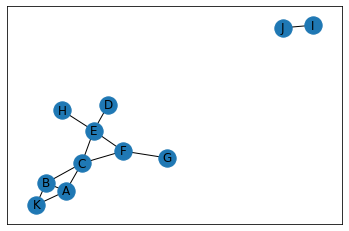

In [7]:
nx.draw_networkx(G)

Clustering coefficient measures the degree to which nodes in a network tend to "cluster" or form triangles.

## 1. Local Clustering Coefficient
Find the fraction of pairs of the node's friends that are friends with each other.

In [3]:
nx.clustering(G, 'F')

0.3333333333333333

In [5]:
nx.clustering(G, 'A')

0.6666666666666666

In [6]:
nx.clustering(G, 'J')

0

## 2. Global Clustering Coefficient

Approach 1: average all the *local clustering coefficients* over all nodes in the graph

In [9]:
nx.average_clustering(G)

0.28787878787878785

### Compare

Approach 2: measuring clustering on the whole network
** percentage of "open traids" that are triangles in a network

**traingle**: three nodes + three edges 

----> contains 3 different open traids

**open traids**: three nodes + two edges

transitivity = 3* number of closed traids (traingles)/ number of open traids

Transitivity: Ratio of number of traingles and number of "open traids" in a network.

In [10]:
nx.transitivity(G)

0.4090909090909091

### Conclusion
Both approaches measure the tendency for edges to form triangles. Transitivity weights nodes with large degree higher. (penalize)



#  Distance Measures

How far is node A from node H?

are nodes far away or close to each other in the network?

**Path**: A sequence of nodes connected by an edge.

Could have different paths (takes different "hops")

**Path Length**: number of steps it contains from beginning to end.

**Distance between two nodes**: the length of the shortest path between two nodes.

In [11]:
nx.shortest_path(G, "A", "H")

['A', 'C', 'E', 'H']

In [12]:
nx.shortest_path_length(G, "A", "H")

3

**Question:** Find the distince from node A to every other node.

**Breadth-first search (BFS)**: a systematic and efficient procedure for computing distances from a node to all other nodes in a large network by "discovering" nodes in layers.

In [13]:
T = nx.bfs_tree(G, 'A')

In [15]:
list(T.edges())  # tree adges

[('A', 'K'),
 ('A', 'B'),
 ('A', 'C'),
 ('C', 'E'),
 ('C', 'F'),
 ('E', 'D'),
 ('E', 'H'),
 ('F', 'G')]

In [16]:
nx.shortest_path_length(G, 'A')  # A ~ any other nodes

{'A': 0, 'B': 1, 'C': 1, 'K': 1, 'E': 2, 'F': 2, 'D': 3, 'H': 3, 'G': 3}

### Characterizing distance in a network
**Question**: How to characterize the distance between all pairs of nodes in a graph?

**Average distance** between every pair of nodes

In [18]:
G = nx.Graph()
G.add_edges_from([
    ('A','K'), ('A', 'B'),
    ('A', 'C'), ('B', 'C'),
    ('B', 'K'), ('C', 'E'),
    ('C','F'),('D','E'),('E','F'),
    ('E','H'),('F','G')
])

In [19]:
nx.average_shortest_path_length(G)

2.138888888888889

**Diameter**: maximum distance between every pair of nodes

In [20]:
nx.diameter(G)

4

**Eccentricity** of a node n is the **largest distance between n and all other nodes**.

In [21]:
nx.eccentricity(G)

{'A': 3, 'K': 4, 'B': 3, 'C': 2, 'E': 3, 'F': 3, 'D': 4, 'H': 4, 'G': 4}

The **Radius** of a graph is the **minimum eccentricity**.

In [23]:
nx.radius(G)

2

### Identifying central and periphery nodes

The **Periphery** of a graph is the set of nodes that have **eccentricity equal to the diameter**.

In [24]:
nx.periphery(G)

['K', 'D', 'H', 'G']

The **center** of a graph is the set of nodes that have **eccentricity equal to the radius**

In [25]:
nx.center(G)

['C']

### Karate Club Network Example

In [26]:
G = nx.karate_club_graph()

In [28]:
G = nx.convert_node_labels_to_integers(G, first_label=1)

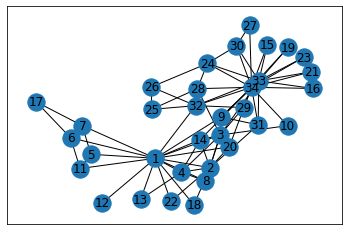

In [33]:
nx.draw_networkx(G)

Average shortest path, raduis, diameter, center

In [35]:
nx.average_shortest_path_length(G)

2.408199643493761

In [36]:
nx.center(G)

[1, 2, 3, 4, 9, 14, 20, 32]

# Connected Components

An undirected graph is connected if, for every pair nodes, there is a path between them.

In [37]:
nx.is_connected(G)

True

### Connected Components:

a subset of nodes such as

1. every node in the subset has a path to every other node,

2. No other node has a path to any node in the subset.

In [ ]:
nx.number_connected_components(G)

### Connectivity in Directed Graphs

strongly connected: a directed graph if, for every pair nodes u and v, there is a directed path from u to v and a directed path from v to u.


weakly connected: a directed graph if, replacing all directed edges with undirected edges produces a connected undirected graph.

# Network Robustness

the ability of a network to maintain its general structural properties (connectivity) when it faces failures or attacks (removal of nodes or edges)